In [1]:
from IPython.display import Image

# Part A-1: E4D Installation on NERSC

Part_A_E4D_Install is the first section of the PFLOTRAN_E4D_Coupling workflow. This note will show you how to **install and compile E4D** following **Tim C. Johnson's (also E4D Author) instruction**. Please see the link for the author's website: https://bitbucket.org/john775/e4d_dev/wiki/Home.<br>
This notebook will show the complete installation steps and results of installing E4D on NERSC. Some tips will be also included in this notebook. Some instruction steps are not the same with Tim's because I do not have permission to install softwares or packages on NERSC, so some alternatives methods are used here. If you want to install E4D on your own system, you can follow Tim's instruction absolutely. I will also explain what alternative methods I use and why I use them.<br>
Thank you for reading this notebook. If you have any question or any advice to promote this notebook, please send Email to hongsheng.wang@pnnl.gov. Also, if you think anything in this repository is not allowed, please contact me and I will delete relevant contents once I receive your Email.

## Step 5: Compile Triangle

Enter the path of **'e4d_dev/third_party'** and create a folder named **'triangle'**.

**Command Example 5.1**
```Linux Terminal
cd /global/project/projectdirs/m1800/E4D_20190818/e4d_dev/third_party/
mkdir triangle
```

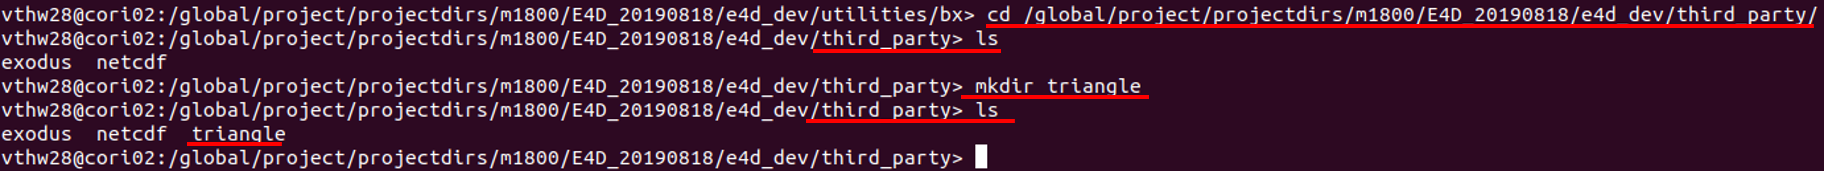

In [3]:
Image(filename='E4D_Install_Screenshot/1_53_mkdir_tri.png')

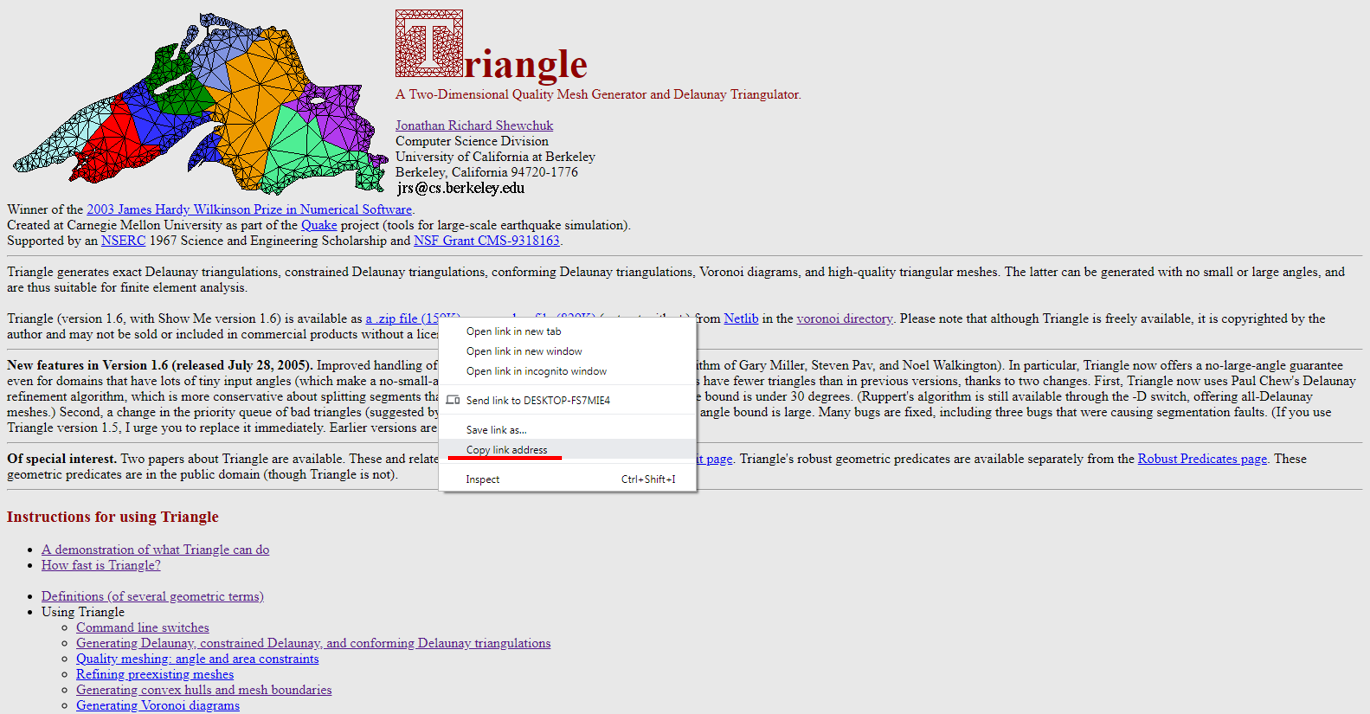

In [4]:
Image(filename='E4D_Install_Screenshot/1_54_tri_download.png')

Enter the created **'triangle'** and download **'triangle.zip'** from the link:  https://www.cs.cmu.edu/~quake/triangle.html.

**Command Example 5.2**
```Linux Terminal
wget http://www.netlib.org/voronoi/triangle.zip
```

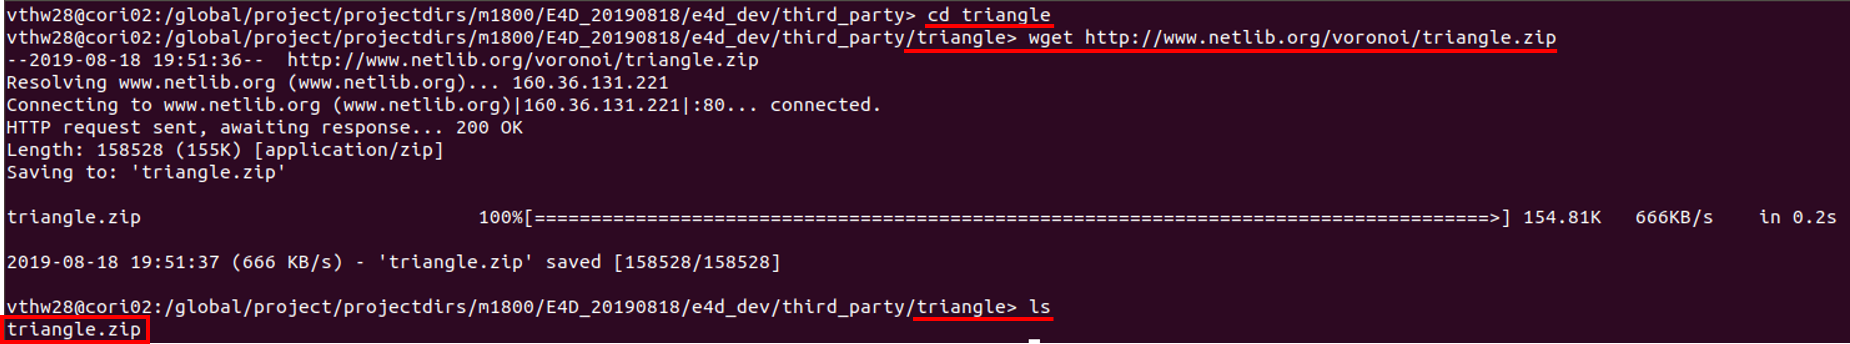

In [5]:
Image(filename='E4D_Install_Screenshot/1_55_tri_downloading.png')

Unzip the compressed file using the command:

**Command Example 5.3**
```Linux Terminal
unzip triangle.zip
```

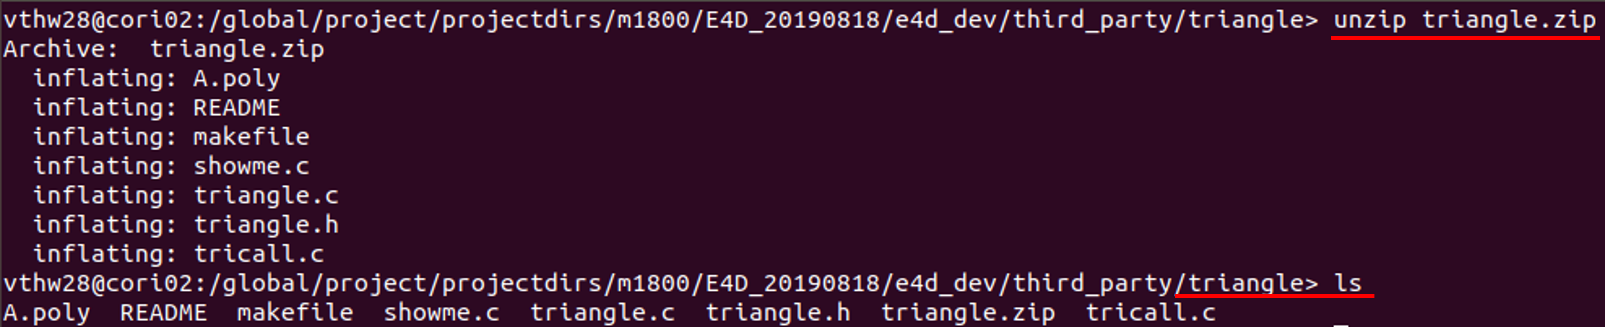

In [6]:
Image(filename='E4D_Install_Screenshot/1_56_tri_unzip.png')

Compile **'triangle'** using the command below. There will be an error about **'-lX11'**, which can be ignored.

**Command Example 5.4**
```Linux Terminal
make
```

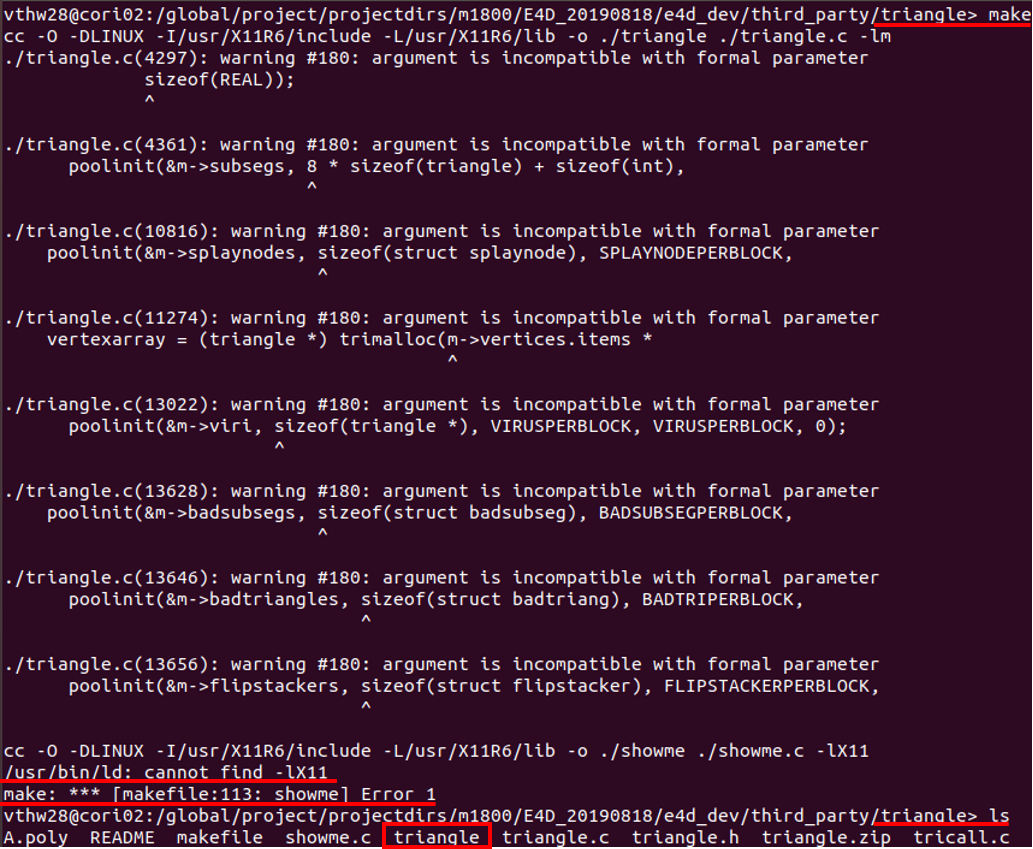

In [2]:
Image(filename='E4D_Install_Screenshot/1_57_tri_make.png')

Copy the executable **'triangle'** to the path **'e4d_dev/bin'**:

**Command Example 5.5**
```Linux Terminal
cp triangle /global/project/projectdirs/m1800/E4D_20190818/e4d_dev/bin
```

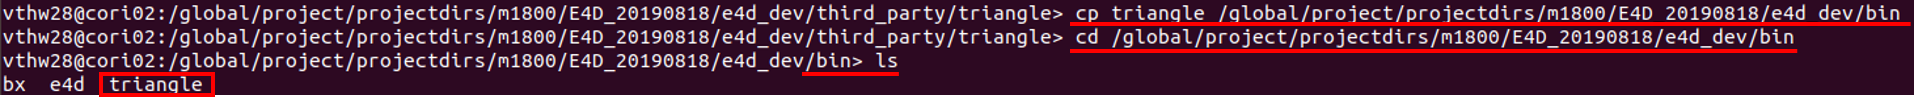

In [8]:
Image(filename='E4D_Install_Screenshot/1_58_cp_tri.png')

## Step 6: Compile Tetgen

Enter the path of **'e4d_dev/third_party'** and create a folder named **'tetgen'**.

**Command Example 6.1**
```Linux Terminal
cd /global/project/projectdirs/m1800/E4D_20190818/e4d_dev/third_party/
mkdir tetgen
```

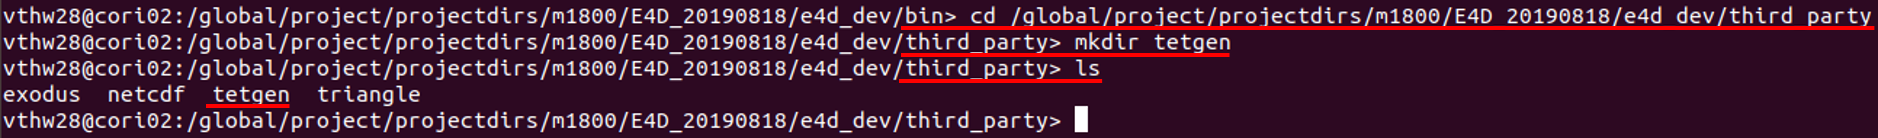

In [9]:
Image(filename='E4D_Install_Screenshot/1_59_mkdir_tet.png')

Download **'tetgen'** from the link: http://wias-berlin.de/software/tetgen/download2.jsp. Something different with previous downloading is that you need to input your information and get the download link, which means you can't use **'wget'** like previous steps.<br>
As a result, I downloaded that individually and upload the file into the target folder **'e4d_dev/thrid_party/tetgen'**. Untar the compressed file using the command below:

**Command Example 6.2**
```Linux Terminal
tar -xvzf tetgen1.5.1.tar.gz
```

E4D will read the E4D Configuration file, call 'triangle' to generate surface file, and call 'tetgen' to generate mesh files by running: <br>
    <font color='red'><center>**/global/project/projectdirs/m1800/E4D_20190818/e4d_dev/bin/tetgen -pnq1.3a1000000000.0aAA emesh7t.poly**<center></font>      

The command above is designed for 'tetgen1.5.0', so sometimes it will cause some error like there are some negative flags in .1.node file if you download the latest 'tetgen' version -- **'tetgen1.5.1'**. I uploaded the **'tetgen1.5.0'** in the same folder. You can use it directly.<font>

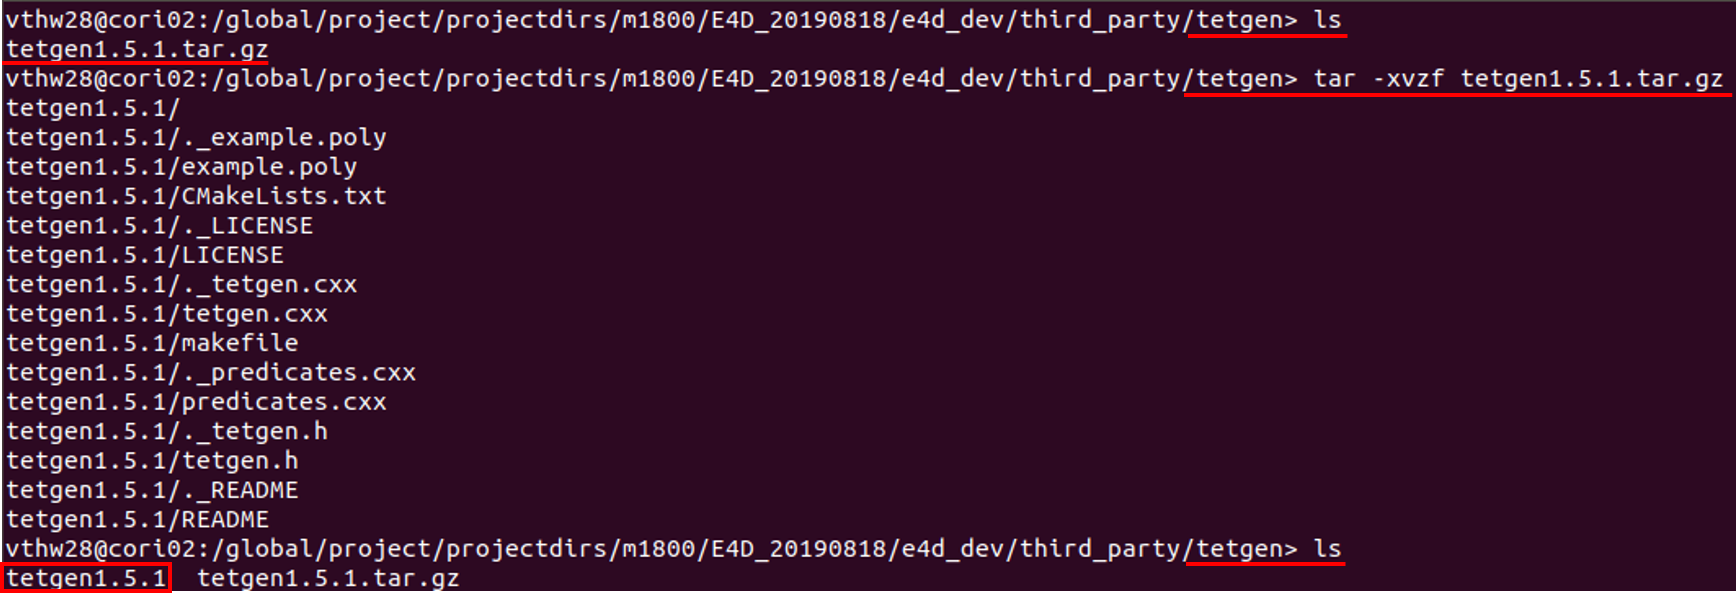

In [3]:
Image(filename='E4D_Install_Screenshot/1_60_tet_download_untar.png')

Enter the **'tetgen1.5.1'** folder and compile **'tetgen'** using command:

**Command Example 6.3**
```Linux Terminal
cd tetgen1.5.1/
make
```

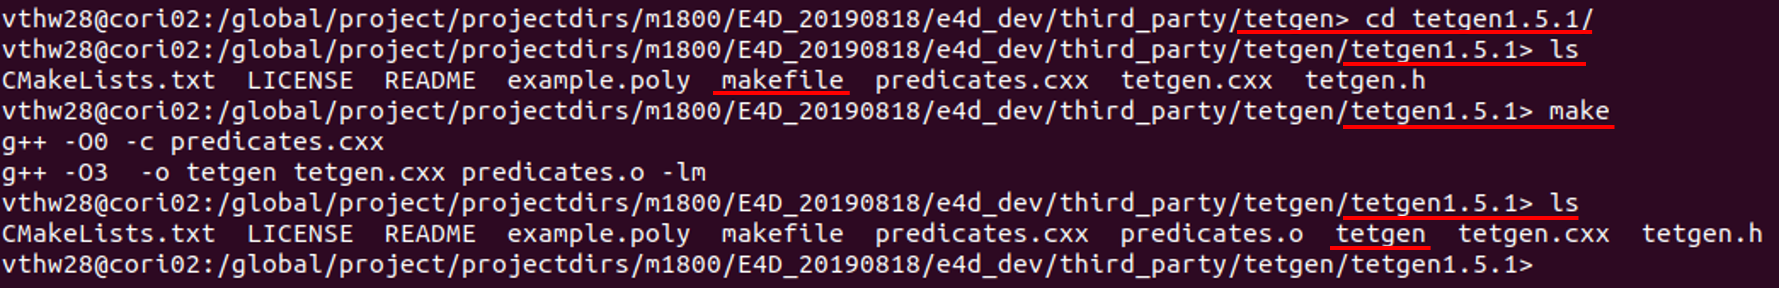

In [11]:
Image(filename='E4D_Install_Screenshot/1_61_tet_make.png')

Copy the executable **'triangle'** to the path **'e4d_dev/bin'**:

**Command Example 6.4**
```Linux Terminal
cp tetgen /global/project/projectdirs/m1800/E4D_20190818/e4d_dev/bin
```

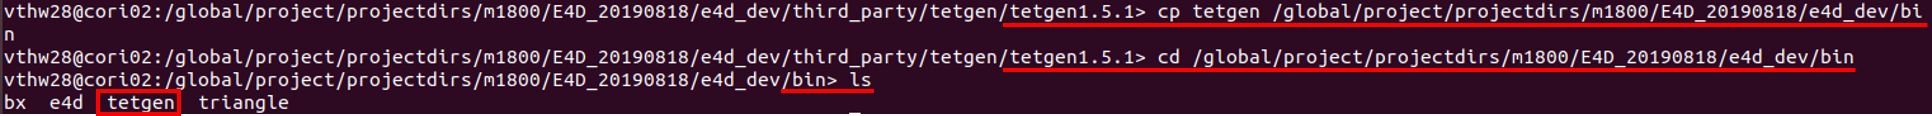

In [12]:
Image(filename='E4D_Install_Screenshot/1_62_cp_tet.png')

<font color='red'>After **Step 6**, the **E4D Installation** has finished. **Step 7** is to do test using the tutorials provided by Tim C. Johnson.<br>
    You do not need to do the test.</font>

## Step 7: E4D Test

The tutorials are located the path **'e4d_dev/tutorials'**.

**Command Example**
```Linux Terminal
cd /global/project/projectdirs/m1800/E4D_20190818/e4d_dev/tutorials
```

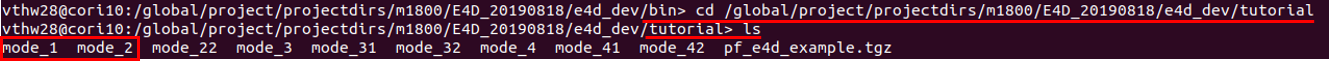

In [13]:
Image(filename='E4D_Install_Screenshot/1_63_test_tu.png')

I use **'mode_1'** to test mesh generation and **'mode_2'** to test forward model running. **'mode_2'** needs the parallel computing.<br>
Enter **'mode_1'** and untar the compressed file:

**Command Example**
```Linux Terminal
tar -xvzf two_blocks.tgz
```

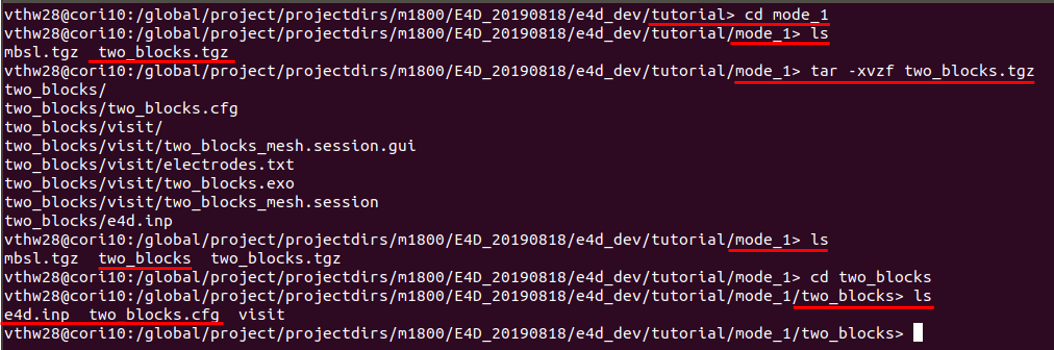

In [14]:
Image(filename='E4D_Install_Screenshot/1_64_test_mode1.png')

There are two files in the folder **'e4d_dev/tutorial/mode_1/two_blocks'**: **'e4d.inp'** and **'two_blocks.cfg'**. So when you run **'E4D'**, it will read **'e4d.inp'** which contains the **'run_mode'** and **'input_file_name'**. Open **'e4d.inp'** to see the example here.

**Command Example**
```Linux Terminal
vim e4d.inp
```

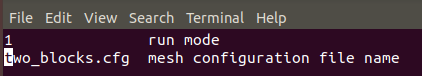

In [4]:
Image(filename='E4D_Install_Screenshot/1_65_mode1_ex.png')

**'1'** is the running mode, which means **'mesh_generation_mode'** and **'two_blocks.cfg'** is the configuration file name, which should in the same folder with **'e4d.inp'**. The **'e4d'** running is not the point of this part. If you want to know more information, please see **'PartB'** and **'PartC'**.<br>
Under the folder containing **'e4d.inp'** and **'two_blocks.cfg'**, run e4d using the command with the format:
**mpirun_path/mpirun -np processor_number e4d_path/e4d**. For example, with the installation steps above, the running command should be :<br>
<font color='red'><center>**/global/project/projectdirs/m1800/E4D_20190818/petsc/arch-linux2-c-opt/bin/mpirun -np 1 /global/project/projectdirs/m1800/E4D_20190818/e4d_dev/bin/e4d**<center><font>

Remeber I skipped one step when I compile **'bx'**, so I meet a error here.

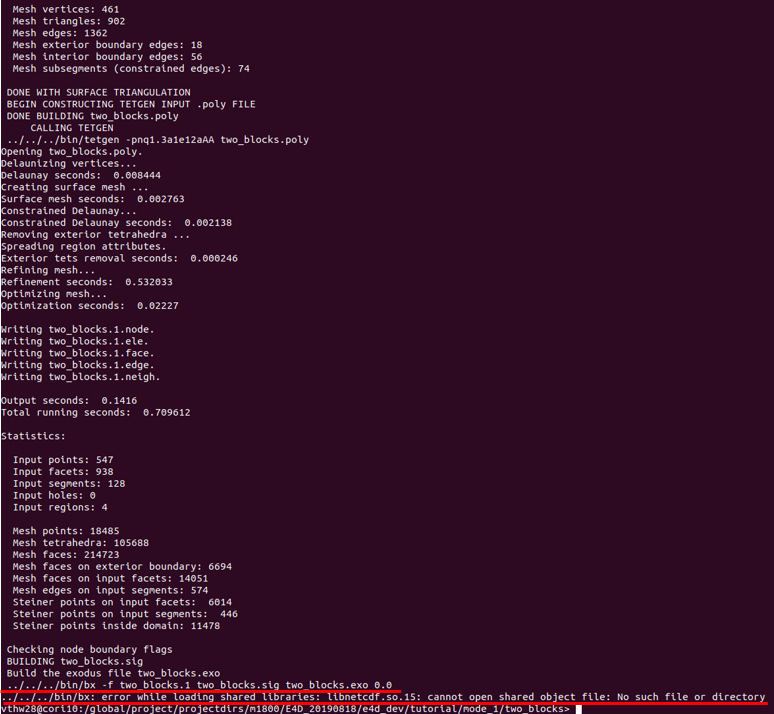

In [5]:
Image(filename='E4D_Install_Screenshot/1_66_bx_error.png')

There are two solutions:<br>
1. One time solution: everytime you want to use E4D to generate the visulization file **.exo**, run the command below first:<br>
<font color='red'><center>export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/global/project/projectdirs/m1800/E4D_20190818/e4d_dev/third_party/netcdf-c-4.7.0/liblib/.libs <center><font>

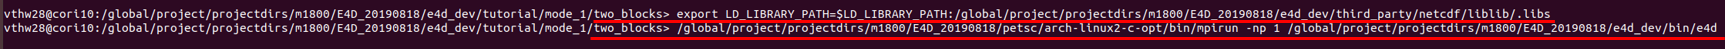

In [6]:
Image(filename='E4D_Install_Screenshot/1_67_add_lib.png')

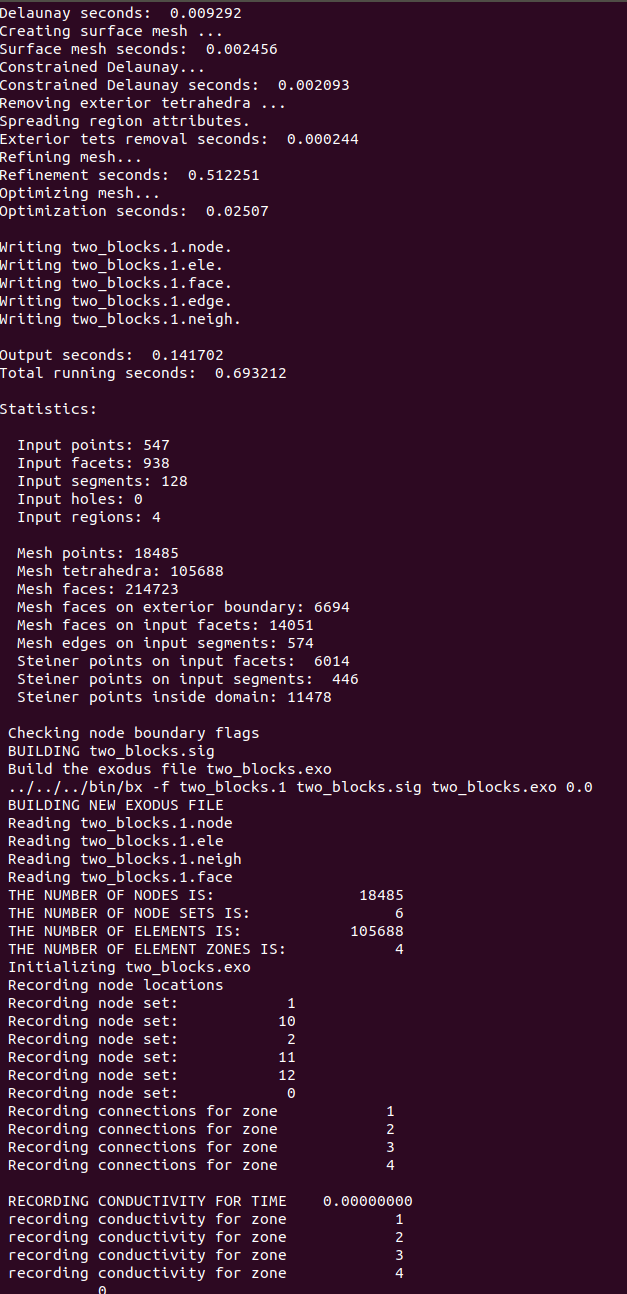

In [7]:
Image(filename='E4D_Install_Screenshot/1_68_mode1_result.png')

<font color='red'>2. Once-for-all solution: add the path into the **.bashrc**. I will do further check about the permission. So I leave a blank here and will finish here as soon as possible.<font>

Test the **'forward_mode'** running. Enter the folder **'e4d_dev/tutorials/mode_2'** and enter the folder **'two_blocks'**.

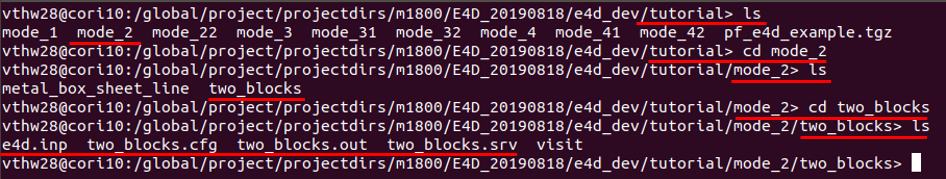

In [8]:
Image(filename='E4D_Install_Screenshot/1_69_mode2_test.png')

Open the **'e4d.inp'** to see an example.

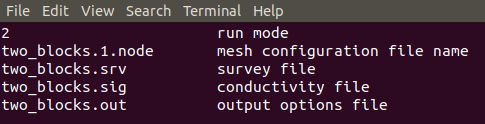

In [9]:
Image(filename='E4D_Install_Screenshot/1_70_e4d_inp_mode2.png')

**'2'** means **'Forward_mode'** and the other lines are the other input files name.Also, the folder does not contain the mesh file **'two_blocks.1.node'**. So run the **'mode_1'** first. Only the results of running **mode_1** are shown here.<br>
**Forward_mode** needs at lease **'2'** processors because one processor would be the **'master_processor'** to assisgn the computational tasks to other processors. For example, I set **'4'** processors used here, which means **'1'** processor assign the computational tasks to other **'3'** processors.

**Command Example**
```Linux Terminal
/global/project/projectdirs/m1800/E4D_20190818/petsc/arch-linux2-c-opt/bin/mpirun -np 4 /global/project/projectdirs/m1800/E4D_20190818/e4d_dev/bin/e4d
```

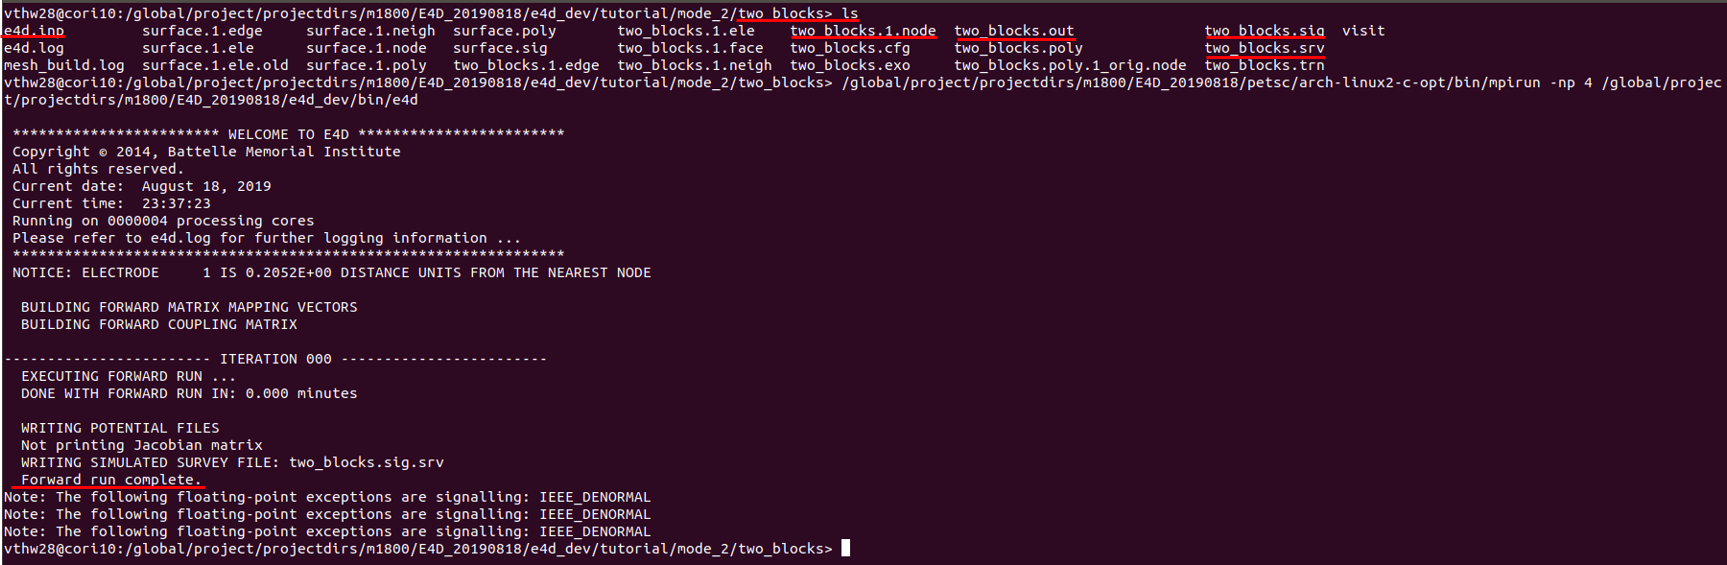

In [21]:
Image(filename='E4D_Install_Screenshot/1_71_mode2_result.png')

Because it is a test, I will not show the result of the results. Please see **'PartC'** for more information of **Forward_mode** running.<br>
Until here, the **E4D Installation** is finished.

Thank you for your patience of reading such a long notebook. I am still learning how to use Linux system, so I will keep updating the instruction if I find any better commands. If you have any questions, or advice, please contact me: hongsheng.wang@pnnl.gov. Also, if you think anything is not allowed in this notebook, please contact me and I will delete relevant contents once I see your Email.